## Demonstração do Neo4j usando o py2neo e dados do Twitter importados a partir do graphdemos.

Fonte: Adaptado de https://github.com/nicolewhite/neo4j-jupyter (Nicole White)


### Acessar o site e autorizar, com o seu usuário do twitter, para a geração do grafo com os dados da sua rede.
http://network.graphdemos.com/

** Anote a URL, usuário e senha gerados. **

### Dados gerados para acesso a minha rede.
#### Estes dados expiram em poucos dias, para gerar um novo grafo, acessar o site novamente e logar com o seu usuário do twitter.

URL: http://54.167.103.160:32839

- Username: neo4j
- Password: stuff-americans-junction

### Modelo de dados do grafo gerado com os dados do twitter.
- É importante esclarecer que apenas uma parte dos dados do twitter são utilizados para a geração deste grafo. Para considerar mais dados considere utilizar a API oficial do Twitter para a aquisição dos dados.

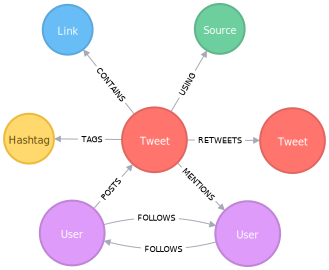

In [1]:
from IPython.display import SVG
SVG("images/twitter-data-model.svg")

In [2]:
from py2neo import Graph, authenticate, DBMS
authenticate("54.167.103.160:32839", "neo4j", "stuff-americans-junction")
graph = Graph("http://54.167.103.160:32839/db/data/")
my_dbms = DBMS("http://54.167.103.160:32839")
my_dbms.kernel_version

(2, 2, 8)

#### Exemplo 1: Recuperar o seu nome.

In [3]:
query = """
MATCH (u:User)
WHERE u.screen_name = {name}
RETURN u.name;
"""

graph.run(query, name="daniellinssilva").data()

[{'u.name': 'Daniel Lins'}]

#### Exemplo 2: Recuperar os usuários que mais mencionaram você.

In [9]:
query = """
MATCH (u:User)-[:POSTS]->(t:Tweet)-[:MENTIONS]->(m:User {screen_name:'daniellinssilva'})
WHERE u.screen_name <> {name}
RETURN u.screen_name AS screen_name, COUNT(u.screen_name) AS count 
ORDER BY count 
DESC LIMIT 5
"""

graph.run(query, name="daniellinssilva").data()

[{'count': 16, 'screen_name': 'MonicaAikawa'},
 {'count': 4, 'screen_name': 'naiandramorim'},
 {'count': 2, 'screen_name': 'jean_ssilva'},
 {'count': 2, 'screen_name': 'sciasxp'},
 {'count': 1, 'screen_name': 'reFlamengo'}]

#### Recuperar a quantidade de usuários que seguem você e quem você segue.

In [5]:
query = """
MATCH (me:User {screen_name: {name}})-[relation:FOLLOWS]->(friends)
RETURN COUNT(relation)
"""

FOLLOWING = graph.run(query, name="daniellinssilva").data()

query = """
MATCH (me:User {screen_name: {name}})<-[relation:FOLLOWS]-(friends)
RETURN COUNT(relation)
"""
FOLLOWERS = graph.run(query, name="daniellinssilva").data()

FOLLOWING, FOLLOWERS

([{'COUNT(relation)': 183}], [{'COUNT(relation)': 155}])

#### Recuperar os usuários que você segue e que também seguem você (followback).

In [6]:
query = """
MATCH (me:User {screen_name: {name}})-[:FOLLOWS]->(f),
      (f)-[:FOLLOWS]->(me)
RETURN f.name
"""

graph.run(query, name="daniellinssilva").data()

[{'f.name': 'Daniel Martínez, MSc'},
 {'f.name': 'Kaio Rafael'},
 {'f.name': 'Naiandra Amorim'},
 {'f.name': 'Structr'},
 {'f.name': 'Machine Learning'},
 {'f.name': 'R Programming Lang'},
 {'f.name': 'Nathan Tippy'},
 {'f.name': 'Mike Tamir, PhD'},
 {'f.name': 'SysCoding'},
 {'f.name': 'Renzo'},
 {'f.name': 'Bruno Pedro'},
 {'f.name': 'ZooSphere'}]

#### Verificar as hashtags mais utilizadas nos tweets enviados pelos usuários que você segue.
##### Organizar os resultados em um dataframe do Pandas facilita a utilização de diversas ferramentas para análise e visualização destes dados.

In [7]:
import pandas as pd

query = """
MATCH (me:User)-[:FOLLOWS]->(u:User)-[:POSTS]-(t:Tweet)-[:TAGS]->(h:Hashtag)
WHERE me.screen_name = {name}
RETURN h.name AS hashtag, COUNT(t) AS tweets
ORDER BY tweets DESC
LIMIT 10
"""

results = graph.run(query, name="daniellinssilva").data()

df = pd.DataFrame(results)
df

,hashtag,tweets
0,neo4j,55
1,oracle,8
2,couchbase,6
3,jdbc,6
4,datamodeling,4
5,nlp,4
6,graphdatabases,3
7,analytics,3
8,bigdata,3
9,graphdb,3
